# Data Preprocessing

In [ ]:
import pandas as pd
data=pd.read_csv("kc_house_data.csv")
data.head() 


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.info() 
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
data["bathrooms"].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [ ]:
data=data.astype({"bathrooms":"int64","floors":"int64"})

In [ ]:
data["bathrooms"].value_counts()
data["floors"].value_counts()


1    12590
2     8402
3      621
Name: floors, dtype: int64

In [ ]:
for x in data["date"] : 
  x=x.split("T")[0]
data["date"]=pd.to_datetime(data["date"])


In [ ]:
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

#Data viz

Feature Transformation 

In [ ]:
data['date'] = pd.DatetimeIndex(data['date']).year
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data["date"]=encoder.fit_transform(data["date"])
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,0,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,1,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,0,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,1,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Correlation 

In [ ]:
corr=data.corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,0.01,-0.02,0.00,-0.00,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
date,0.01,1.00,0.00,-0.01,-0.02,-0.03,0.01,-0.02,-0.00,0.00,-0.05,-0.03,-0.02,-0.02,0.00,-0.02,0.00,-0.03,0.00,-0.02,-0.00
price,-0.02,0.00,1.00,0.31,0.51,0.70,0.09,0.24,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,-0.01,0.31,1.00,0.47,0.58,0.03,0.16,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,-0.00,-0.02,0.51,0.47,1.00,0.70,0.09,0.48,0.06,0.18,-0.13,0.61,0.64,0.25,0.43,0.06,-0.16,0.03,0.18,0.51,0.08
sqft_living,-0.01,-0.03,0.70,0.58,0.70,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.01,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,-0.02,0.24,0.16,0.48,0.35,-0.01,1.00,0.02,0.02,-0.29,0.47,0.52,-0.24,0.58,-0.01,-0.10,0.03,0.16,0.30,-0.01
waterfront,-0.00,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.00,0.40,0.08,0.18,0.28,0.07,0.02,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07


we will  build a model that predicts the price of the houses ,we will use linear regression so we have to keep variables that are in strong correlation with price (it can be positive or negative correlation ) :  

1.   sqft_living (0.7)
2.   bedrooms(0.31)
3.  bathrooms(0.51)
4.  floors(0.24)
5.   waterfront (0.27)
6.   view(0.4)
7. grade(0.67)
8.  sqft_above(0.61)
9.  sqft_basement(0.32)
10.  sqft_living15(0.59)
11. lat(0.32) 






 Feature Seletion 

In [ ]:
data=data.drop(["id","date","sqft_lot","condition","yr_built","yr_renovated","zipcode","long","sqft_lot15"],axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1,1180,1,0,0,7,1180,0,47.5112,1340
1,538000.0,3,2,2570,2,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1,770,1,0,0,6,770,0,47.7379,2720
3,604000.0,4,3,1960,1,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2,1680,1,0,0,8,1680,0,47.6168,1800


Outliers

In [ ]:
from scipy import stats 
import numpy as np 
z=np.abs(stats.zscore(data))
print(z)
print(np.where(z>3))
data=data[(z<3).all(axis=1)]
data


[[0.86671733 0.39873715 1.02024597 ... 0.65868104 0.35257175 0.9433552 ]
 [0.00568792 0.39873715 0.3405647  ... 0.2451414  1.16156823 0.43268619]
 [0.98084935 1.47395936 1.02024597 ... 0.65868104 1.28353661 1.07013975]
 ...
 [0.37586519 1.47395936 2.38105664 ... 0.65868104 0.24788796 1.41025258]
 [0.38158814 0.39873715 0.3405647  ... 0.65868104 0.18441416 0.8412214 ]
 [0.58588173 1.47395936 2.38105664 ... 0.65868104 0.24572284 1.41025258]]
(array([    5,     5,     5, ..., 21590, 21590, 21600]), array([ 2,  3, 11, ...,  9, 11,  8]))


,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1,1180,1,0,0,7,1180,0,47.5112,1340
1,538000.0,3,2,2570,2,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1,770,1,0,0,6,770,0,47.7379,2720
3,604000.0,4,3,1960,1,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2,1680,1,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2,1530,3,0,0,8,1530,0,47.6993,1530
21609,400000.0,4,2,2310,2,0,0,8,2310,0,47.5107,1830
21610,402101.0,2,0,1020,2,0,0,7,1020,0,47.5944,1020
21611,400000.0,3,2,1600,2,0,0,8,1600,0,47.5345,1410


Variable Distribution 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(78000.0, 1636000.0)

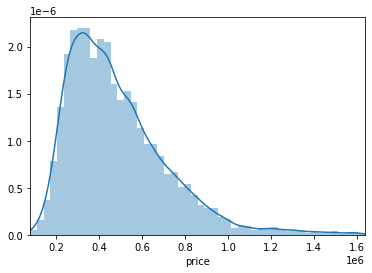

In [ ]:
sns.distplot(data["price"])
plt.xlim(data["price"].min(), data["price"].max())
#the majority of the price is between 75000 and 1000000


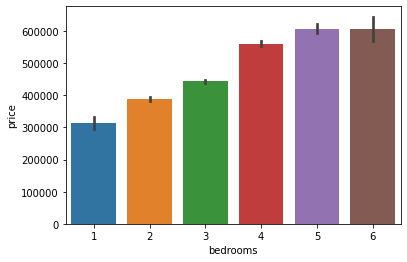

In [ ]:
sns.barplot(x=data["bedrooms"],y=data["price"])
sns.set(rc={'figure.figsize':(12,12)})
#the price increases with the number of bedrooms in the house  but from number of bedrooms = 8 it begins to decrease 


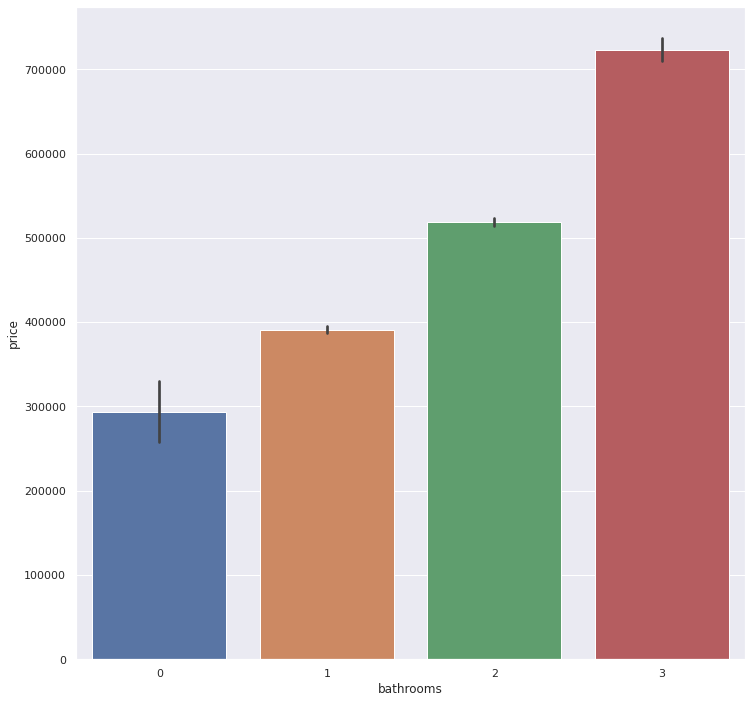

In [ ]:
sns.barplot(x=data["bathrooms"],y=data["price"])
#the price increases with the number of bathrooms in the house 


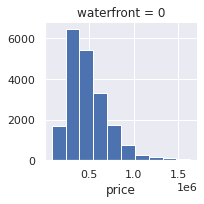

In [ ]:
g=sns.FacetGrid(data,col="waterfront")
g.map(plt.hist,"price")
#the mojority of the house sold don t have waterfront 

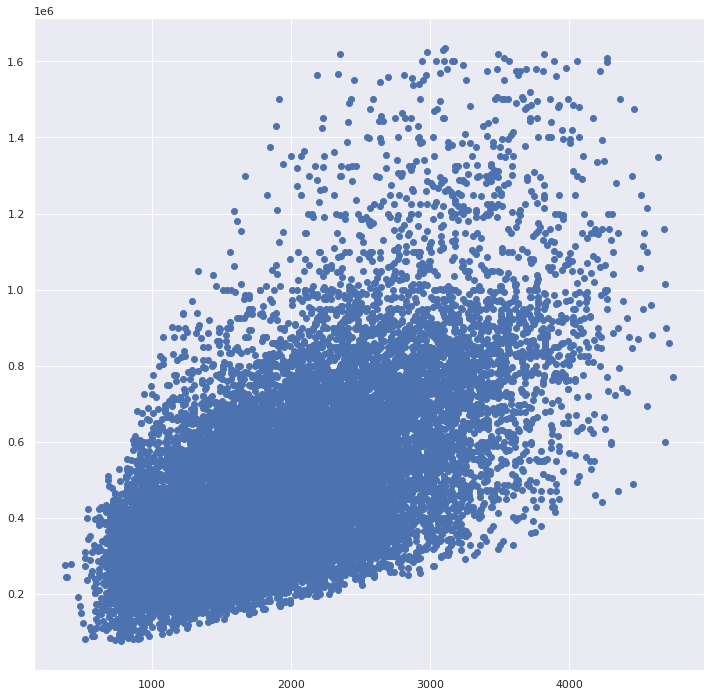

In [ ]:
plt.plot(data["sqft_living"],data["price"],"bo")
#By observing the graph we can see that there’s a positive correlation between price  and sqft_living  We can think of fitting a straight line between the points
#we can use linear regression 

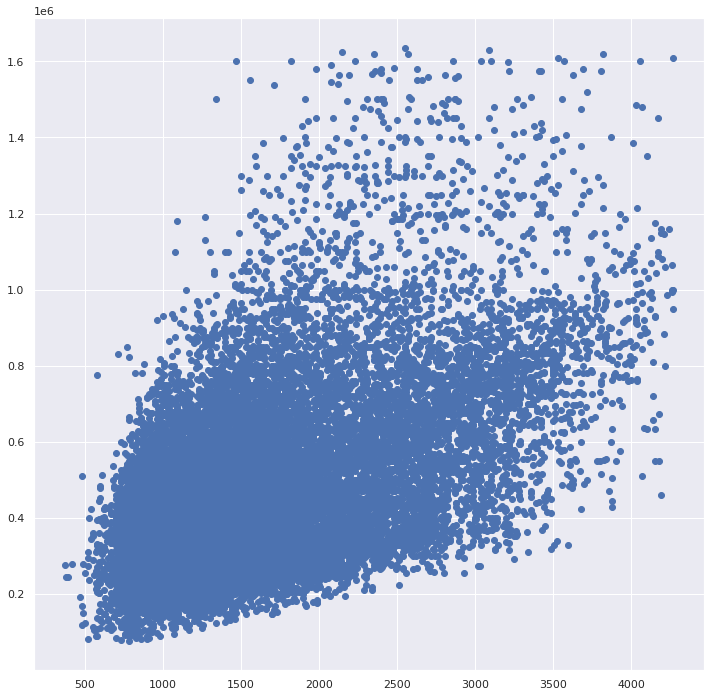

In [ ]:
plt.plot(data["sqft_above"],data["price"],"bo")
#same interpretation

# Building model : LinearRegression 


Simple LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
x=data[["sqft_living"]]
y=data[["price"]]
model=LinearRegression() 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("mean_squarred_error",mean_squared_error(y_test,predicted))
print("r**2",metrics.r2_score(y_test,predicted))
print("a",model.coef_)
print("b",model.intercept_)


mean_squarred_error 34252951565.503952
r**2 0.3882798490831201
a [[193.62635084]]
b [104631.90492191]





**r2 _squared 0.38 -> 38% output variation can be  explained by the model input  
 we can add more variable to have a better r_squared and a better model that best fits the dataset**

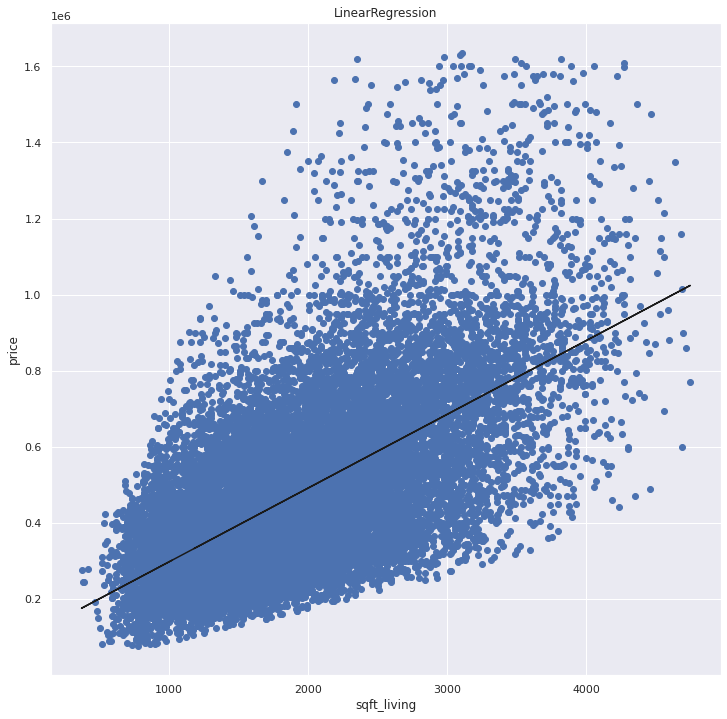

In [ ]:
plt.scatter(x,y,color="b")
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title("LinearRegression")
plt.plot(x,model.predict(x),"k")


Multi Linear Regression 



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
x=data[["sqft_living","sqft_above","sqft_living15","bedrooms","bathrooms","lat","view","sqft_above","grade"]]
y=data[["price"]]
model=LinearRegression() 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("mean_squarred_error",mean_squared_error(y_test,predicted))
print("r**2",metrics.r2_score(y_test,predicted))
print("coefficients",model.coef_)
print("b",model.intercept_)

mean_squarred_error 21035691034.962364
r**2 0.6243256272400386
coefficients [[ 1.24396354e+02 -1.08024611e+01  3.13493197e+01 -8.24041869e+03
  -1.99581494e+03  6.07026038e+05  5.26136608e+04 -1.08024611e+01
   7.01584557e+04]]
b [-29155424.51677539]


 **r_squarred =0.62 -> 62% of the output variation can be explained by the model's input**
**.in multi_linearregression we have higher r_squarred , multi linear regression buils a model that fits more the dataset than the simple linear regression**

#Building model :Polynomial Regression  


simple polyregression 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x=data[["sqft_living"]]
y=data[["price"]]
model=LinearRegression() 
poly=PolynomialFeatures(degree=2) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
x_train=poly.fit_transform(x_train)
model.fit(x_train,y_train)
x_test=poly.fit_transform(x_test)

predicted=model.predict(x_test)
print("mean_squarred_error",mean_squared_error(y_test,predicted))
print("r**2",metrics.r2_score(y_test,predicted))
print("a",model.coef_)
print("b",model.intercept_)

mean_squarred_error 33849980420.949
r**2 0.39547647180016954
a [[0.00000000e+00 8.74583392e+01 2.42262086e-02]]
b [206312.78362393]


**r_squared = 0.39 -> 39% of the output variation can be  explained by the model's input**

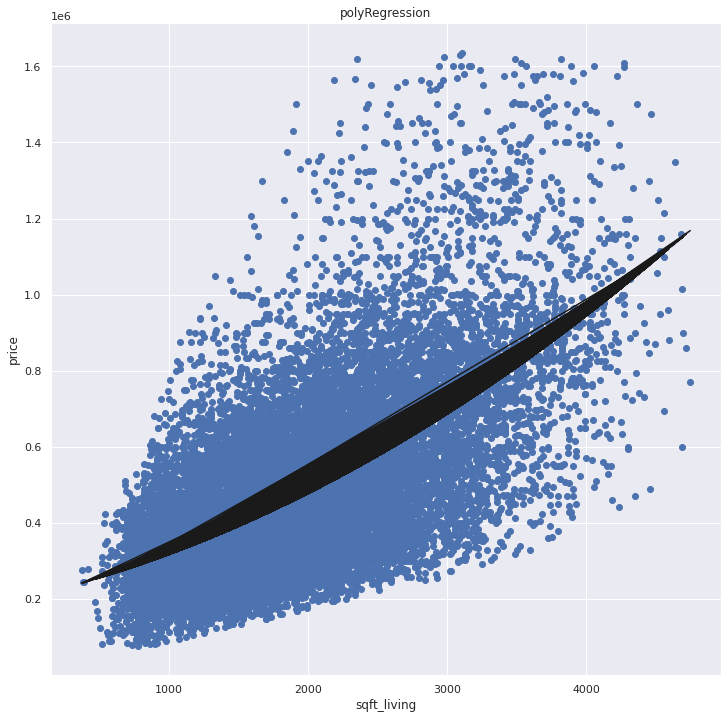

In [ ]:


plt.scatter(x,y,color="b")
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title("polyRegression")

plt.plot(x,model.predict(poly.fit_transform(x)),"k")

multi polynomial regression 



In [ ]:
x=data[["sqft_living","sqft_above","sqft_living15","bedrooms","bathrooms","lat","view","sqft_above","grade"]]
y=data[["price"]]
poly=PolynomialFeatures(degree=2)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
x_train=poly.fit_transform(x_train)
model.fit(x_train,y_train)
x_test=poly.fit_transform(x_test)
predicted=model.predict(x_test)
print("mean_squarred_error",mean_squared_error(y_test,predicted))
print("r**2",metrics.r2_score(y_test,predicted))
print("coefficients",model.coef_)
print("b",model.intercept_)

mean_squarred_error 18106812362.854736
r**2 0.6766321883225959
coefficients [[ 3.39429216e+00 -9.42482227e+03  4.18312698e+03 -1.95183227e+02
  -1.73132831e+06  6.00632679e+05  1.75511280e+08 -1.07842855e+06
   4.18312795e+03 -5.17457573e+06 -6.04956764e-02 -4.59922460e-02
  -1.04304482e-02 -2.70726431e+01  3.10943113e+01  1.98665259e+02
  -2.88702922e+01  1.92672888e-01  2.25067543e+01 -3.93680565e-01
   2.39894878e-01  9.29388846e+00 -5.43274295e+00 -8.78093286e+01
   9.78487509e+00  1.28831593e-01  1.29412454e+00  4.07017181e-02
   1.73129426e+00 -2.19182506e+01  6.98961454e+00  1.15673586e+01
  -2.86866848e-01 -1.66775172e+01  6.12255920e+03 -3.30887037e+03
   3.42626743e+04  1.52016303e+03  9.29407604e+00  1.08694282e+04
   1.05949484e+04 -1.31398650e+04  9.45983809e+02 -5.43246216e+00
  -1.32937030e+03 -1.85048879e+06  2.43019487e+04 -8.78093300e+01
   1.07743775e+05 -3.96535057e+04  9.78472734e+00  4.91215422e+03
   1.72501326e-01  1.29833379e+00  4.39183084e+03]]
b [-4.16125619

**r_squered = 0.67 ->67% its better than the other algorithms we use multi poly regression because it has the higher accuracy**

